# Predicting Used Car Prices

## About Dataset 

`used_cars.csv` dataset was taken from Auto Trader website.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set()

## Load Data

In [2]:
# Loading data from csv file and exploring it
data = pd.read_csv("used_cars.csv")
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Descriptive Statistics

In [3]:
# Explore dataset by including categorical and numerical variables
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


## Data Preprocessing 

### Determine Variables of Interest

Since there are unique 312 models we would need over 300 dummy variables. A lot of information from `Model` could be engineered from other features like `EngineV`, `Brand`, `Year` so dropping `Model` variable would not affect too much variabitility.

In [4]:
data1 = data.drop("Model", axis=1)
data1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with Missing Values 

In [5]:
# Find number of missing values
data1.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Since it is less than 5% of the data we can remove these missing values.

In [6]:
data2 = data1.dropna(axis=0)
data2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring PDFs

Looking at probability distribution functions (PDFs) of variables we can easily spot anomalies like outliers.

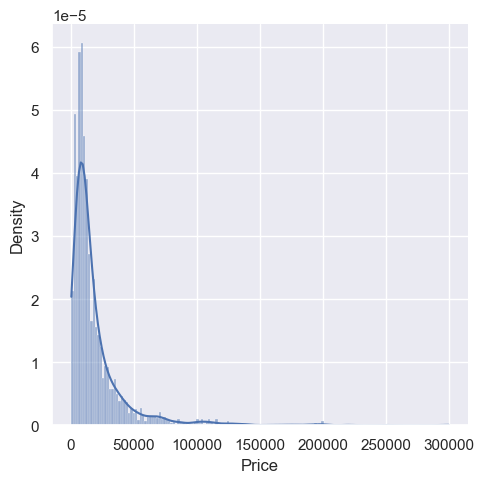

In [7]:
sns.displot(data2["Price"], kde=True, stat="density")

### Dealing with Outliers

It's evident that outliers exist in the `Price` variable, and their presence can significantly skew the results of regression analysis. One approach to mitigate their impact is to remove the top 1% of observations. This strategy is particularly relevant in the context of predicting used car prices, where excessively high prices may not align with the typical market values and could distort the predictive model. By excluding these extreme values, the regression model can focus on capturing the underlying patterns and relationships among the majority of the data points, thus leading to more accurate predictions for typical market scenarios.

In [8]:
data3 = data2[data2["Price"] < data2["Price"].quantile(0.99)]
data3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


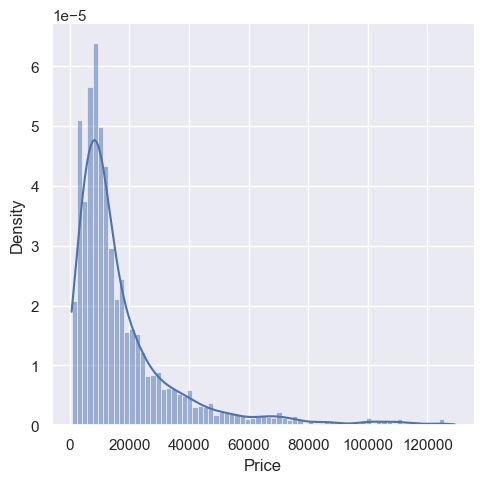

In [9]:
# Check the PDF again
sns.displot(data3["Price"], kde=True, stat="density")

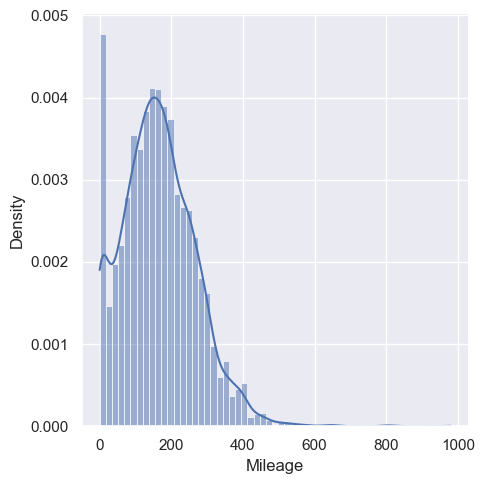

In [10]:
# Treat other numerical variables in a similar way
sns.displot(data3["Mileage"], kde=True, stat="density")

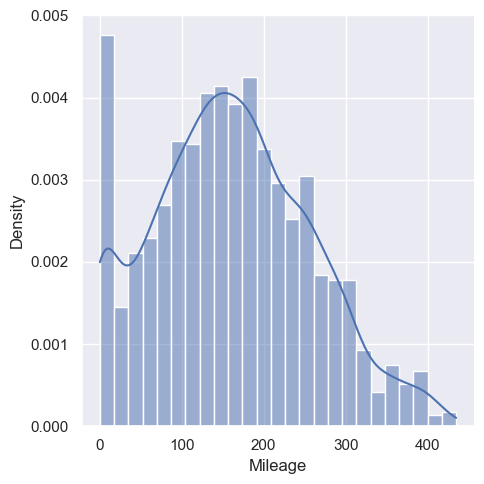

In [11]:
# Similar to Price variable remove 1% of top Mileage variable
data4 = data3[data3["Mileage"] < data3["Mileage"].quantile(0.99)]
sns.displot(data4["Mileage"], kde=True, stat="density")

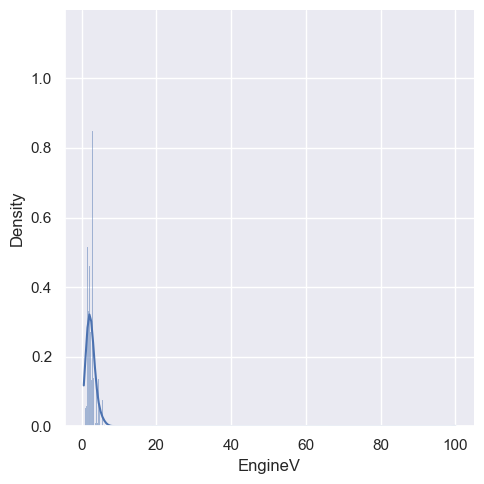

In [12]:
# Explore Engine volume variable.
sns.displot(data4["EngineV"], kde=True, stat="density")

Checking [online](https://en.wikipedia.org/wiki/Engine_displacement) it seems that engine volumes are typically between 0.6 and 6.5. Therefore, higher values can be removed.

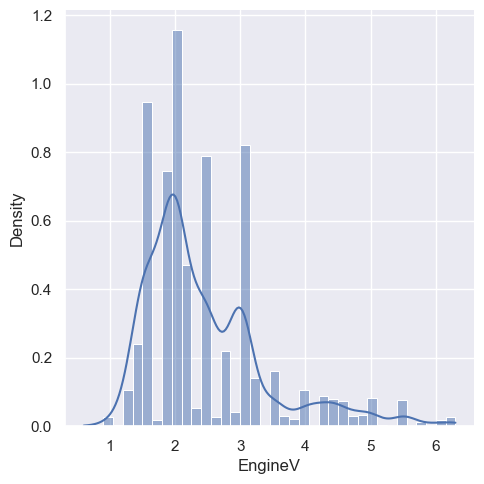

In [13]:
data5 = data4[data4["EngineV"] < 6.5]
sns.displot(data5["EngineV"], kde=True, stat="density")

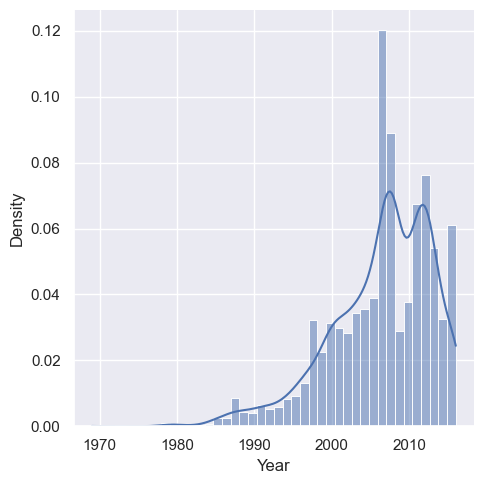

In [14]:
# Look at the Year variable.
sns.displot(data5["Year"], kde=True, stat="density")

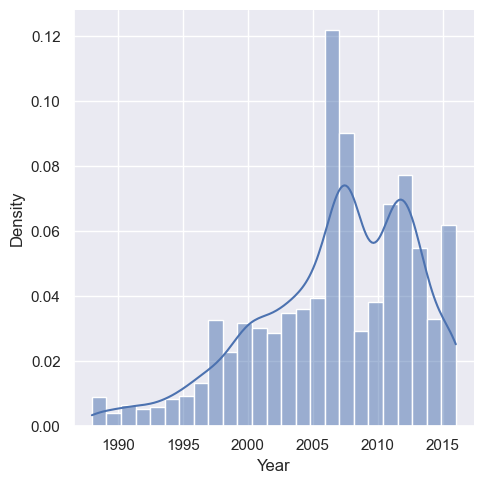

In [15]:
# This variable has outliers on the low end. This will also be removed.
data6 = data5[data5["Year"] > data5["Year"].quantile(0.01)]
sns.displot(data6["Year"], kde=True, stat="density")

In [16]:
# Finally, we reset index.
data_cleaned = data6.reset_index(drop=True)
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

### Linearity

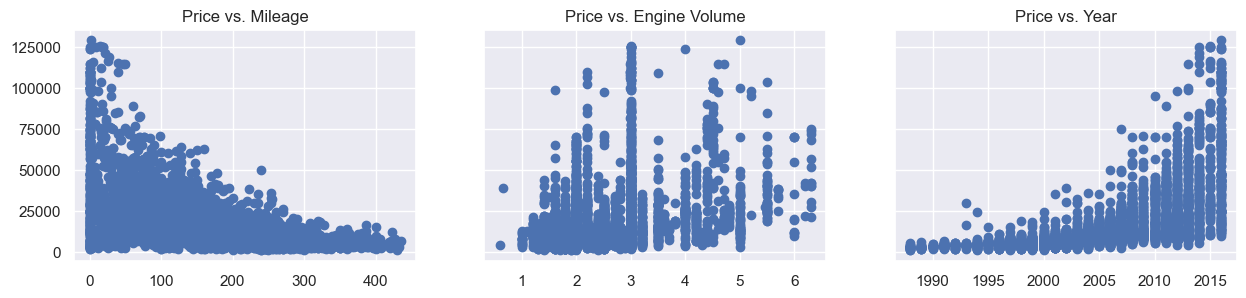

In [17]:
# Compare plots of Price vs Mileage, EngineV, and Year
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax1.set_title("Price vs. Mileage")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title("Price vs. Engine Volume")
ax3.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax3.set_title("Price vs. Year")
plt.show()

Graphs show that data is not linear but rather exponential. This can be seen from the price PDF as well where data is exponentially distributed.Therefore, data should be transformed and a good choice would be log transformation.

In [18]:
# Log transformation of Price variable
log_price = np.log(data_cleaned["Price"])

# Add log_price to a new column
data_cleaned["Log_price"] = log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


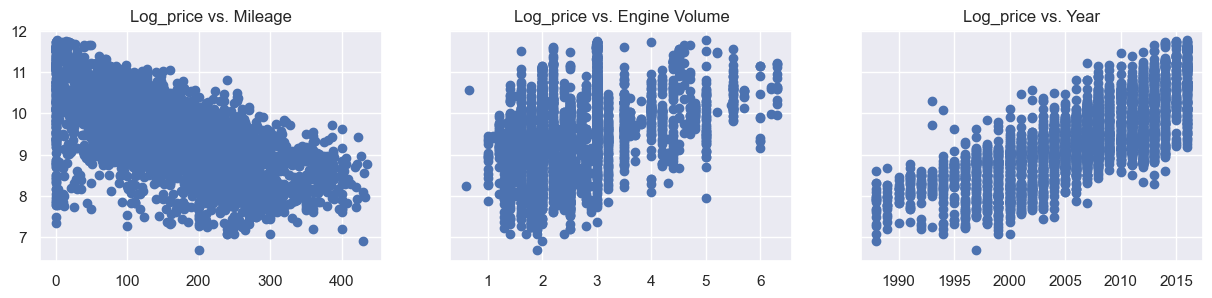

In [19]:
# Check plots again using Log_price
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(15, 3))
ax1.scatter(data_cleaned["Mileage"], data_cleaned["Log_price"])
ax1.set_title("Log_price vs. Mileage")
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Log_price"])
ax2.set_title("Log_price vs. Engine Volume")
ax3.scatter(data_cleaned["Year"], data_cleaned["Log_price"])
ax3.set_title("Log_price vs. Year")
plt.show()

Resulting graphs show that data is linear, and therefore, we can use log transformed price instead of the Price variable.

In [20]:
# The Price column can be removed
data_cleaned = data_cleaned.drop("Price", axis=1)

### Multicollinearity

To check the multicollinearity refer to [this documentation](https://www.statsmodels.org/dev/_modules/statsmodels/stats/outliers_influence.html#variance_inflation_factor) that is explaining variance inflation factor from the statsmodels library.

In [21]:
# Import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a variable that will contain all the features that should be examined for multicollinearity.
variables = data_cleaned[["Mileage", "EngineV", "Year"]]

# Create a new data frame that will include all variance inflation factors (VIFs)
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


If VIF = 1 then there is no multicollinearity, if it is 1 < VIF < 5 it is acceptable. There is currently no consensus on unacceptable condition. It can be larger than 5 or sometimes larger than 10. In any case the feature `Year` has large VIF value and it should be removed from the model.

In [22]:
data_no_multicollinearity = data_cleaned.drop("Year", axis=1)

In [23]:
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
